# <center>SGD for linear regression on Boston House Price Dataset</center>
___

###  <b>Exercise</b> :

1.	Load  Boston House Prices Dataset from sklearn.datasets.load_boston()
2.	Perform linear regression on the dataset.
3.	Implement stochastic gradient descent for linear regression from scratch.
4.	Compare simple linear regression and SGD for linear regression.
5.	Write your observations in English as crisply and unambiguously as possible. Always quantify your results.


### Information regarding data set :

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

---

### <b>Objective :</b> 
> <span style="color:blue">Implement SGD for linear regression and compare with linear regression.<span>

---

In [8]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
from math import sqrt
from sklearn import preprocessing
from random import randrange
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score

### (1) Load dataset :

In [9]:
# Prepare dataset
boston_house = pd.DataFrame(boston.data,columns=boston.feature_names,dtype=np.float64)

# Add new column "PRICE" and assign target data to it.
boston_house['PRICE'] = boston.target
    
# Feature dataframe
x_data = boston_house.drop('PRICE',axis = 1)

# Target dataframe
y_data = boston_house[['PRICE']]

### (2) Split dataset :

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_data.values,y_data.values,test_size = 0.33, random_state = 5)

# Data standardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


print("Training feature shape(x_train): ",x_train.shape)
print("Testing feature shape(x_test): ",x_test.shape)
print("Training target shape(y_train): ",y_train.shape)
print("Testing target shape(y_test): ",y_test.shape)

Training feature shape(x_train):  (339, 13)
Testing feature shape(x_test):  (167, 13)
Training target shape(y_train):  (339, 1)
Testing target shape(y_test):  (167, 1)


### (3) Using Linear Regression :


 ---Slope--- 
 [[-1.31193031  0.86187745 -0.16719287  0.18957843 -1.48658584  2.79131565
  -0.32737703 -2.77204093  2.97567549 -2.2727549  -2.13375869  1.05842993
  -3.33495407]]

---Intercept--- 
 [22.53716814]

---MSE--- 
 28.530458765974625

---R2_score--- 
 0.6956551656111603



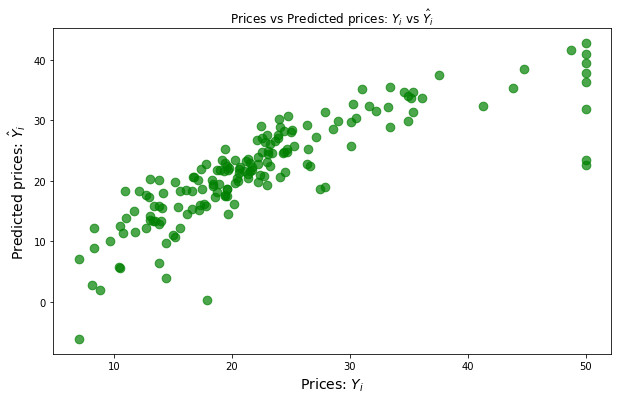

In [11]:
linearRegression = LinearRegression()
linearRegression.fit(x_train,y_train)

predicted_y_test_lr =  linearRegression.predict(x_test)

print("\n ---Slope--- \n",linearRegression.coef_)
print("\n---Intercept--- \n",linearRegression.intercept_)
print("\n---MSE--- \n",mean_squared_error(y_test, predicted_y_test_lr))
print("\n---R2_score--- \n",r2_score(y_test, predicted_y_test_lr))

print()
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=14) 
plt.scatter(y_test,predicted_y_test_lr,s=75,color="green",alpha=0.7)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
print()
print()


### (4) Using SGDRegressor  :


 ---Slope--- 
 [-0.96842358  0.50302329 -0.52699385  0.27704946 -0.68329797  2.82216224
 -0.35483353 -1.74530613  0.81514581 -0.61380728 -1.83018167  0.86616868
 -2.84714597]

---Intercept--- 
 [22.54162035]

---MSE--- 
 30.046626596033494

---R2_score--- 
 0.6794816490571516



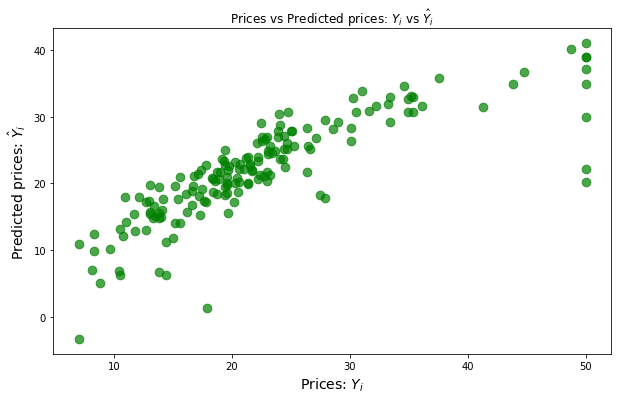

In [65]:

sgdRegressor = SGDRegressor(penalty='l2', alpha=0.15, max_iter=4000,tol = 0.00001)
sgdRegressor.fit(x_train,y_train.ravel())

predicted_y_test_sgdr =  sgdRegressor.predict(x_test)

print("\n ---Slope--- \n",sgdRegressor.coef_)
print("\n---Intercept--- \n",sgdRegressor.intercept_)
print("\n---MSE--- \n",mean_squared_error(y_test, predicted_y_test_sgdr))
print("\n---R2_score--- \n",r2_score(y_test, predicted_y_test_sgdr))

print()
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=14) 
plt.scatter(y_test,predicted_y_test_sgdr,s=75,color="green",alpha=0.7)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
print()
print()

### (5) Using SGD for Linear Regression :(Custom implementation of SGD)
### <center>Error Function</center>

![title](linear_regression_error.png)

### <center> Gradient Descent w.r.t. m,b</center>

![title](linear_regression_gradient.png)

In [34]:
# Create our own implementation of SGDLinearRegression
class SGDLinearRegression():
    def __init__(self,
                 n_features = 0,
                 learning_rate=1,                 
                 learning_rate_behaviour="constant",
                 epochs=1000,
                 batch_size=100,
                 convergence_tolerence = 0.001,
                 allow_preemptive_convergence = False):
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.learning_rate_behaviour = learning_rate_behaviour
        self.epochs = epochs
        self.batch_size = batch_size
        self.convergence_tolerence = convergence_tolerence 
        self.allow_preemptive_convergence = allow_preemptive_convergence
        self.slope_ = np.asarray([0] * n_features)
        self.intercept_ = np.atleast_1d(0)
        
        # Store test set and train set error values - cost function used is MSE
        self.train_cost = np.zeros((epochs,), dtype=np.float64)
        self.test_cost = np.zeros((epochs,), dtype=np.float64)
        self.learning_rate_value = np.zeros((epochs,), dtype=np.float64)
        
    # Plot error with each epoch
    def plot_mse(self):
        plt.figure(figsize=(12, 6))
        plt.title('Training data - MSE vs Iteration')
        plt.plot(np.arange(self.epochs) + 1, self.train_cost , 'b-',label='Training Error')
        plt.legend(loc='upper right')
        plt.xlabel('Iterations')
        plt.ylabel('MSE')
        plt.show()
    
    # Plot lerning rate
    def plot_learning_rate(self,title):
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.plot(np.arange(self.epochs) + 1, self.learning_rate_value , 'b-',label='Learning Rate')
        plt.legend(loc='upper right')
        plt.xlabel('Iterations')
        plt.ylabel('Learning Rate')
        plt.show()
        
    # plot predicted values
    def plot_predicted_values(self,x_axis_data,y_axis_data):
        print()
        plt.figure(figsize=(10,6))
        plt.rc('axes', labelsize=14) 
        plt.scatter(x_axis_data, y_axis_data,s=75,color="red",alpha=0.7)
        plt.xlabel("Prices: $Y_i$")
        plt.ylabel("Predicted prices: $\hat{Y}_i$")
        plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
        plt.show()
        print()
        print()
        
    
    
    # Adjust learning rate
    def adjust_learning_rate(self,multiplier):
        return self.learning_rate if self.learning_rate_behaviour == "constant" else (self.initial_learning_rate / multiplier) 
    
    # Loss function - Mean Squared Error
    def calculate_mse(self,y,y_predict,N):
        # MSE = 1/n * sum_from_i_to_n(y_i - y_predicted)^2        
        return (1/N) * sum([value**2  for value in (y - y_predict)])
        
    # Calculate stochastic gradient descent   
    def calculate_gradient_descent(self,x_data,y_data,m_current,b_current,learningRate):
        b_gradient = 0
        m_gradient = 0        
        N = float(len(x_data))
        for i in range(0, len(x_data)):
            x = x_data[i]
            y = y_data[i]
            
            # y_predict = mx + b
            y_predict = np.dot(m_current.T, x) + b_current

            # loss function = mean squared error (MSE) 
            loss = self.calculate_mse(y,y_predict,N)            

            # d/dm
            m_gradient += -(2/N) * (x * (y - y_predict))

            # d/db
            b_gradient += -(2/N) * (y - y_predict)

        # update m_current and b_current
        # m = m - learningRate * d/dm
        # b = b - learningRate * d/db        
        m_current = m_current - learningRate * m_gradient
        b_current = b_current - learningRate * b_gradient   

        return [m_current,b_current,loss]
    
    # Randomely selct sample from data with given batch-size or k
    def get_batch_sized_random_sample(self,x,y):                
        x_data = pd.DataFrame({'CRIM':x[:,0],
                               'ZN':x[:,1],
                               'INDUS':x[:,2],
                               'CHAS':x[:,3],
                               'NOX':x[:,4],
                               'RM':x[:,5],
                               'AGE':x[:,6],
                               'DIS':x[:,7],
                               'RAD':x[:,8],
                               'TAX':x[:,9],
                               'PTRATIO':x[:,10],
                               'B':x[:,11],
                               'LSTAT':x[:,12]}) 
        
        x_data = x_data.sample(self.batch_size)        
        
        y_data = pd.DataFrame({'PRICE':y[:,0]})
        y_data  = y_data.iloc[list(x_data.index),:]        
        x = x_data.values
        y = y_data.values
        
        return x,y
        
         
    # Fit the model and calculate slope_ and intercept_
    def fit(self,x,y):
        m = self.slope_
        b = self.intercept_               
        for i in range(1,self.epochs + 1):
            
            # Randomely select samples with given k or batch-size
            x,y = self.get_batch_sized_random_sample(x,y)            
            
            # Adjust learning rate
            self.learning_rate = self.adjust_learning_rate(i)
        
            # find m and b
            m,b,loss = self.calculate_gradient_descent(x,y,self.slope_,self.intercept_,self.learning_rate)
            self.train_cost[i-1] = abs(loss)
            self.learning_rate_value[i-1] = self.learning_rate
            # print("\n---Iteration--- {0}\n ---Loss--- \n{1}\n ".format(i,loss))
            
            # Convergence test
            if(self.allow_preemptive_convergence == True):
                value = self.convergence_tolerence
                if(np.allclose(self.slope_,m,value) and np.allclose(self.intercept_,b,value)):
                    # Optimal coefficient and intercept found
                    # Met Convergence, before iteration exhaust
                    print("----------------------------------------------------------------------------------")
                    print("> Converged after {0}-iteration with tolerence value {1}".format(i,self.convergence_tolerence))
                    print(self.slope_)
                    print(self.intercept_)
                    break  
            
            self.slope_ = m
            self.intercept_ = b
        print("\n ---Slope--- \n",self.slope_)
        print("\n---Intercept--- \n",self.intercept_)

              
    # Predict target values
    def predict(self,x):
        return safe_sparse_dot(x, np.asarray(self.slope_).T,dense_output=True) + self.intercept_
        

----------------------------------------------------------------------------------
> Converged after 21-iteration with tolerence value 0.01
[-1.08857234  0.53103514 -0.43536263  0.25895039 -0.93749814  3.1656964
 -0.64823992 -2.46344794  1.06706509 -0.67801579 -1.96844641  1.07451198
 -3.05874597]
[22.43219408]

 ---Slope--- 
 [-1.08857234  0.53103514 -0.43536263  0.25895039 -0.93749814  3.1656964
 -0.64823992 -2.46344794  1.06706509 -0.67801579 -1.96844641  1.07451198
 -3.05874597]

---Intercept--- 
 [22.43219408]


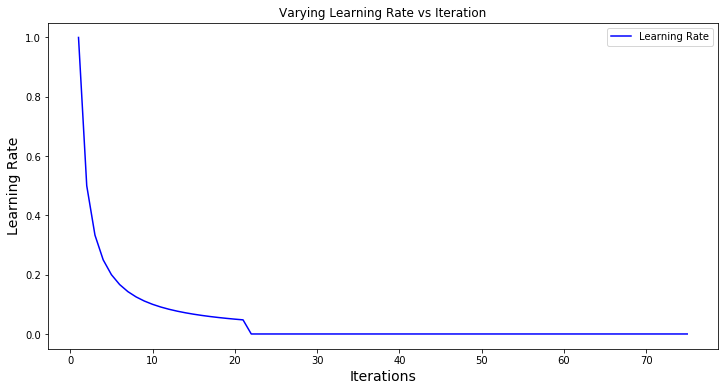

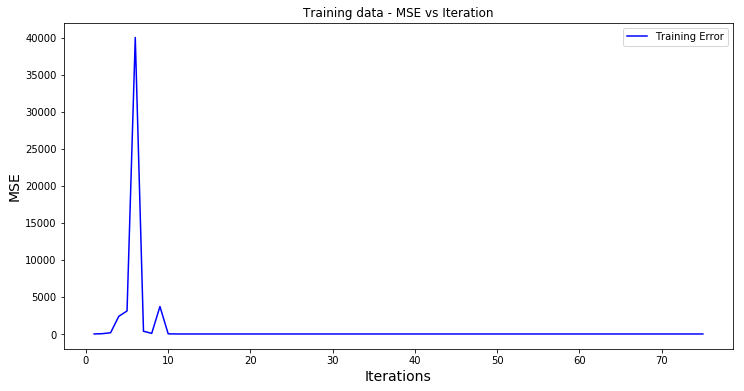

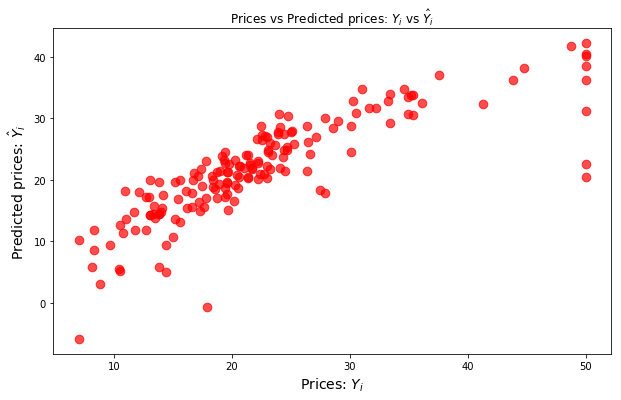

In [44]:
sgdLinearRegression = SGDLinearRegression(n_features = x_train.shape[1],
                                          learning_rate=1,
                                          learning_rate_behaviour="varying",
                                          epochs=75,
                                          batch_size=300,
                                          convergence_tolerence=0.01,
                                          allow_preemptive_convergence=True)
sgdLinearRegression.fit(x_train,y_train)
predicted_y_test_custom_sgd = sgdLinearRegression.predict(x_test)

# Plot Learning rate
sgdLinearRegression.plot_learning_rate("Varying Learning Rate vs Iteration")
print()
print()

# Plot MSE
sgdLinearRegression.plot_mse()
print()
print()

# Plot predicted points
sgdLinearRegression.plot_predicted_values(y_test,predicted_y_test_custom_sgd)

As we can observe that train error does go down and remains constant after 11th iteration,because of that we converge after 21nd-iteration, with tolerence value of 0.01.Now we can again test our model with constant learning rate and no convergence test, doing testing with constant learning rate with much more epochs will give us an idea about global minima and local minima. 
<br/>
<br/>


 ---Slope--- 
 [-1.29956575  0.77447716  0.13891139  0.49104197 -2.24363946  3.21587215
 -0.47734558 -2.93582688  2.77252865 -2.19684871 -2.24121916  1.27967459
 -2.36726829]

---Intercept--- 
 [22.23194694]


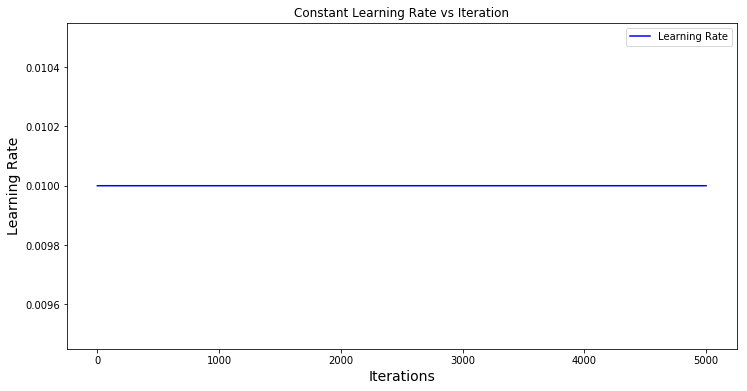

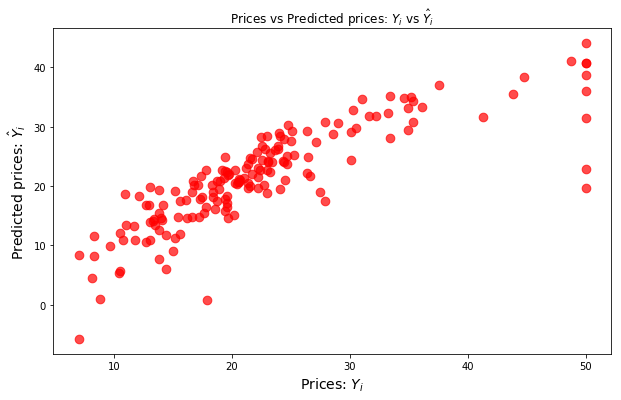

In [68]:
sgdLinearRegression = SGDLinearRegression(n_features = x_train.shape[1],
                                          learning_rate=0.01,
                                          learning_rate_behaviour="constant",
                                          epochs=5000,
                                          batch_size=250,
                                          convergence_tolerence=0.01,
                                          allow_preemptive_convergence=False)
sgdLinearRegression.fit(x_train,y_train)
predicted_y_test_custom_sgd = sgdLinearRegression.predict(x_test)

# Plot Learning rate
sgdLinearRegression.plot_learning_rate("Constant Learning Rate vs Iteration")


# Plot predicted points
sgdLinearRegression.plot_predicted_values(y_test,predicted_y_test_custom_sgd)

Observe that there is no change in the plot after increasing the number of epochs, so we conclude that we have reached global minima and this can be further evaluate when we will merge Sklearn's SGDRegressor plot with our own custom SGDLinearRegressor Plot.
<br/>
<br/>

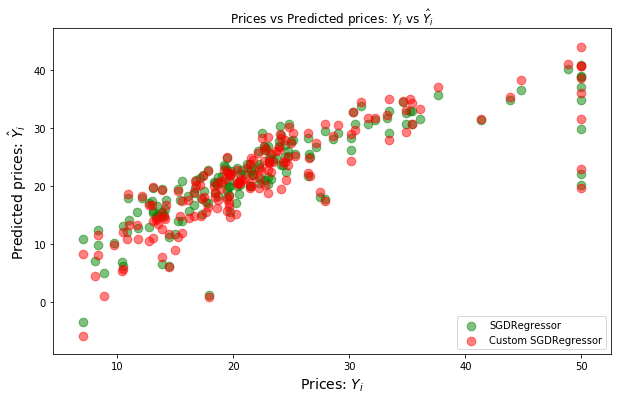

In [69]:
print()
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=14) 
plt.scatter(y_test, predicted_y_test_sgdr,s=75,color="green", alpha=0.5,label='SGDRegressor')
plt.scatter(y_test, predicted_y_test_custom_sgd,s=75,color="red", alpha=0.5,label='Custom SGDRegressor')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='lower right');
plt.show()
print()
print()

###### As you can see that, data is almost overlapping with each other, 
###### which indicates that we have implemented descent SGD for linear regression.
<br/>
<br/>

---
### Observations :
---

> 1. Sklearn's Linear Regression, SGDRegressor and our own implementation of Linear Regression with SGD is applied on Boston house price dataset.
> 2. Model can be improved by introducing L1 and L2 regularization.
> 3. With the help of L1 and L2 regularization,we can also incorporate convergence test to find global minima and exit before iteration complete its execution.Here we dont have much data points to train and test, so we can afford gradient decent to run untill the iteration ends.